In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np 
import pandas as pd

# TAKE HOME ASSESSMENT 

### Jackie Kinsler 

# QUESTION 1 <a id='problem_definition'></a>

1. Identify if it is common for commercial buildings to be larger than 5000 sqft. 
    - Calculate the average size (mean sqft per building) of full population of **commercial** buildings in Illinois. 

**Question**: Would you use this metric of the mean building size to answer their question of whether it’s  common for commercial buildings to be larger than 5000 square feet? Please explain why or why  not and provide visuals if you think visuals would help explain this to a non-technical audience. 

NOTE: 
- **Illinois** based client
    - According to [US Census Region Map](https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf): 
        - Illinios is in the Midwest Region (**Region 2**). 
        - Illinois is in the East North Central	Division (**Division 3**)
- Interested in **commercial buildings**
    - **PBA (Principal building activity) = Office = 2**
- Interested in energy usage data (**consumption and expenditures**)


## Gathering Data / Information <a id='get_data'></a>

In [202]:
df = pd.read_csv('data/2012_public_use_data_aug2016.csv', sep=",")

In [203]:
commercial = df[['PUBID','REGION', 'CENDIV', 'PBA', 'SQFT', 'SQFTC', 'YRCON', 'HTPMPH', 'HTPMPC']].copy()             

In [204]:
ENC = commercial[commercial['CENDIV'] == 3].copy()

Clarifying values: 

HTPMPH (Heat pumps for heating): 
- "'1' = 'Yes'
- '2' = 'No'
- Missing = Not applicable

HTPMPC (Heat pumps for cooling): 
- "'1' = 'Yes'
- '2' = 'No'
- Missing = Not applicable"

In [223]:
commercial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6720 entries, 0 to 6719
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PUBID   6720 non-null   int64  
 1   REGION  6720 non-null   int64  
 2   CENDIV  6720 non-null   int64  
 3   PBA     6720 non-null   int64  
 4   SQFT    6720 non-null   int64  
 5   SQFTC   6720 non-null   int64  
 6   YRCON   6720 non-null   int64  
 7   HTPMPH  6186 non-null   float64
 8   HTPMPC  6036 non-null   float64
dtypes: float64(2), int64(7)
memory usage: 472.6 KB


There are some nulls in the HTPMPH and HTPMPC columns. May change some of the data types to categorical as needed below. 

In [225]:
commercial[commercial.duplicated()]

,PUBID,REGION,CENDIV,PBA,SQFT,SQFTC,YRCON,HTPMPH,HTPMPC


No duplicate rows. 

In [206]:
commercial.shape

(6720, 9)

In [207]:
ENC.shape

(900, 9)

**There is information on 6720 commercial buildings.**

**900 of the buildings are in the East North Central region.**

### Calculate the average size (mean sqft per building) of full population of commercial buildings in Illinois.

In [208]:
round(ENC['SQFT'].mean())

146902

The mean size of commercial buildings in the East North Central	Division is 146,902 sqft. 

This is **not** a good metric to determine if it is common for commercial buildings to be >5,000 sqft.  

The mean value can be driven by outliers. 

For example, on the histogram below, the mean line is the solid vertical dotted line. 

While most of the data is in the first bin (indicating that the square footage of most buildings is between 1-70,000 SQFT), the mean is significantly higher.  

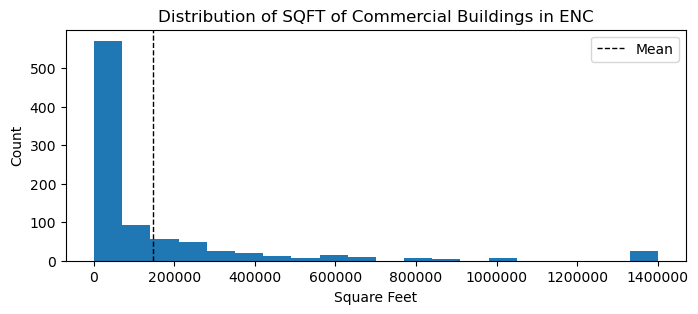

In [234]:
fig, axis = plt.subplots(figsize=(8,3))
ENC['SQFT'].hist(ax=axis, bins=20)
plt.xlabel("Square Feet")
plt.ylabel("Count")
plt.title('Distribution of SQFT of Commercial Buildings in ENC')

plt.axvline(ENC['SQFT'].mean(), color='k', linestyle='dashed', linewidth=1, label='Mean')
axis.ticklabel_format(style = 'plain')
plt.grid(False)
plt.legend()

plt.show()

____
## Alternative Method : Calculate Percentage of Commercial Buildings > 5,000 SQFT

In [210]:
print(f"{round(len(ENC[ENC['SQFT'] > 5000])/ENC.shape[0], 2)*100}% of buildings are over 5000SQFT")

76.0% of buildings are over 5000SQFT


<AxesSubplot:xlabel='over_5000', ylabel='count'>

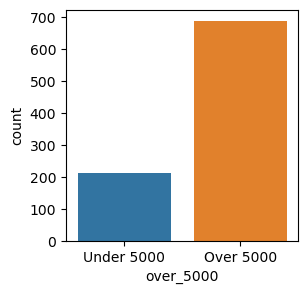

In [211]:
# Add a categorical column indicating buildings over and under 5,000 SQFT. 
ENC['over_5000'] = np.where(ENC['SQFT'] > 5000, 'Over 5000', 'Under 5000')
fig, ax = plt.subplots(figsize=(3,3))
sns.countplot(x='over_5000', data=ENC)

**76.0% of buildings in ENC are over 5000SQFT**

# QUESTION 2 

- How many office buildings are there in Illinios which are larger than 10,000 SQFT AND use a heatpump for heating **or** cooling. 
    - NOTE: This data is for **district**, not just Illinois. An estimate will be determined for Illinois below, based on population ratios. 
- Is "Office" the principal building activity in this population? 
- Visualize how buildings over 10,000 SQFT and use a heatpump are distributed among principal building activities. 

In [212]:
ENC_heatpump = ENC[(ENC['SQFT'] > 10000) & ((ENC['HTPMPH'] == 1) | (ENC['HTPMPC'] == 1) )].copy()

In [215]:
ENC_heatpump.shape

(55, 10)

**There are 55 buildings in the East North Central Division that are greater than 10,000 SQFT and use a heatpump for either heating *or* cooling.**

States and populations (from the [2010 census](http://www.stats.indiana.edu/population/poptotals/historic_counts_states.asp) in the ENC division are: 
- Indiana: 6,483,802
- Illinois: 12,830,632
- Michigan: 9,883,640
- Ohio: 11,536,504
- Wisconsin: 5,686,986


Total area population is approx 46M.  
So, **Illinois is approximately 27% of the population of this region.**

55*.27 = 15

**It is estimated that there are 15 buildings in IL that are over 10,000 SQFT and use a heatpump for heating OR cooling.**

In [216]:
ENC_heatpump['PBA'] = ENC_heatpump['PBA'].astype('category')

In [217]:
ENC_heatpump['PBA'] = ENC_heatpump['PBA'].cat.rename_categories({0: 'Vacant', 
                                                                 2: 'Office',
                                                                 4: 'Laboratory', 
                                                                 5: 'Nonrefrigerated warehouse', 
                                                                 6: 'Food sales', 
                                                                 7: 'Public order and safety', 
                                                                 8: 'Outpatient health care', 
                                                                 11: 'Refrigerated warehouse', 
                                                                 12: 'Religious worship', 
                                                                 13: 'Public assembly', 
                                                                 14: 'Education', 
                                                                 16: 'Inpatient health care', 
                                                                 17: 'Nursing', 
                                                                 18: 'Lodging', 
                                                                 23: 'Strip shopping mall', 
                                                                 26: 'Service'
                                                                })


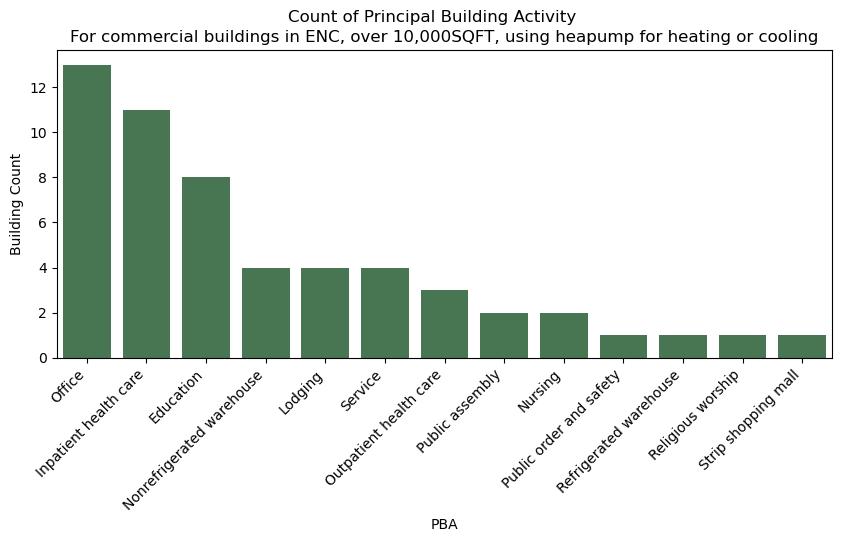

In [231]:
# Add a categorical column indicating buildings over and under 5,000 SQFT. 
fig, ax = plt.subplots(figsize=(10,4))
plt.xticks(rotation=45, ha="right")
plt.suptitle('Count of Principal Building Activity')
plt.title('For commercial buildings in ENC, over 10,000SQFT, using heapump for heating or cooling')
sns.countplot(x='PBA', 
              data=ENC_heatpump, 
              color='#427d4d', 
              order = ENC_heatpump['PBA'].value_counts().index
             )
plt.ylabel('Building Count')

plt.show()

**Yes, office is the principle building activity for buildings over 10,000 SQFT and uses a heatpump for heating *or* cooling.**
